# Lab UBA-IA
## Modelo de clasifiación en Keras 


Objetivo: 

- Intro al ecosistema Keras
- Creación de un modelo de clasificación básico



### 1) Montando el drive en google colab

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/")
!ls

Mounted at /content/drive
'03 - Introducción a la clasificación con Keras'
'04 - Detección de anomalías con Keras'
'05 - Embeddings con Keras'
'06 - Autoencoders con Keras'
'07 - Integrador.ipynb'
'CV2 - 01 - Capas_convolucionales.ipynb'
'CV2 - 02 red_cnn_simple.ipynb'
'CV2 - 03 Modelo_convolucional_aplicacion_keras.ipynb'
 data
 desorden
'Machine Learning 1 - 8.1 Boosting.ipynb'
'Machine Learning 1 - 8.2 Bagging.ipynb'
 model_plot.png
 models


In [2]:
!pip install funpymodeling

     |████████████████████████████████| 225kB 4.5MB/s 
  Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0


### 2) Carga de datos y librerías

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from funpymodeling.exploratory import freq_tbl, status, profiling_num, cat_vars, num_vars
from funpymodeling.data_prep import todf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data=pd.read_csv('data/heart_disease.csv')

In [5]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.000000,0,0.000000,41,int64
1,gender,0,0.000000,0,0.000000,2,object
2,chest_pain,0,0.000000,0,0.000000,4,int64
3,resting_blood_pressure,0,0.000000,0,0.000000,50,int64
4,serum_cholestoral,0,0.000000,0,0.000000,152,int64
5,fasting_blood_sugar,0,0.000000,258,0.851485,2,int64
6,resting_electro,0,0.000000,151,0.498350,3,int64
7,max_heart_rate,0,0.000000,0,0.000000,91,int64
8,exer_angina,0,0.000000,204,0.673267,2,int64
9,oldpeak,0,0.000000,99,0.326733,40,float64


In [6]:
freq_tbl(data)

   gender  frequency  percentage  cumulative_perc
0    male        206    0.679868         0.679868
1  female         97    0.320132         1.000000

----------------------------------------------------------------

  has_heart_disease  frequency  percentage  cumulative_perc
0                no        164    0.541254         0.541254
1               yes        139    0.458746         1.000000

----------------------------------------------------------------



In [7]:
profiling_num(data)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,age,54.438944,9.038662,0.166033,35.00,40.0,48.0,56.0,61.0,68.0,71.00
1,chest_pain,3.158416,0.960126,0.303990,1.00,1.0,3.0,3.0,4.0,4.0,4.00
2,resting_blood_pressure,131.689769,17.599748,0.133646,100.00,108.0,120.0,130.0,140.0,160.0,180.00
3,serum_cholestoral,246.693069,51.776918,0.209884,149.00,175.1,211.0,241.0,275.0,326.9,406.74
4,fasting_blood_sugar,0.148515,0.356198,2.398399,0.00,0.0,0.0,0.0,0.0,1.0,1.00
5,resting_electro,0.990099,0.994971,1.004921,0.00,0.0,0.0,1.0,2.0,2.0,2.00
6,max_heart_rate,149.607261,22.875003,0.152900,95.02,108.1,133.5,153.0,166.0,181.9,191.96
7,exer_angina,0.326733,0.469794,1.437856,0.00,0.0,0.0,0.0,1.0,1.0,1.00
8,oldpeak,1.039604,1.161075,1.116844,0.00,0.0,0.0,0.8,1.6,3.4,4.20
9,slope,1.600660,0.616226,0.384983,1.00,1.0,1.0,2.0,2.0,3.0,3.00


### 3) Preparación de datos



In [8]:
# Eliminamos los NaN (en este caso no impacta eliminar los NA)
data=data.dropna()

In [9]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,41,int64
1,gender,0,0.0,0,0.000000,2,object
2,chest_pain,0,0.0,0,0.000000,4,int64
3,resting_blood_pressure,0,0.0,0,0.000000,50,int64
4,serum_cholestoral,0,0.0,0,0.000000,152,int64
5,fasting_blood_sugar,0,0.0,254,0.855219,2,int64
6,resting_electro,0,0.0,147,0.494949,3,int64
7,max_heart_rate,0,0.0,0,0.000000,91,int64
8,exer_angina,0,0.0,200,0.673401,2,int64
9,oldpeak,0,0.0,96,0.323232,40,float64


In [10]:
from keras.utils import to_categorical 

# La lectura y 'preparación' se las dejo hecha:
data['target'] = data['has_heart_disease'].apply(lambda x: 1 if x == 'yes' else 0)

data_x=data.drop(['target','heart_disease_severity','gender','has_heart_disease'], axis=1)
data_y=to_categorical(data['target'], num_classes=2)

data_y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [12]:
# Explorar `to_categorical`...

Importante: **Normalizar** los datos.

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_x = scaler.fit_transform(data_x)



Separación tr/ts:

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

In [15]:
x_train.shape

(237, 13)

In [16]:
y_train.shape

(237, 2)

#### Entrenamiento del modelo

In [17]:
x_train.shape
status(x_train)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,0,0,0.0,1,0.004219,41,float64
1,1,0,0.0,19,0.080169,4,float64
2,2,0,0.0,1,0.004219,47,float64
3,3,0,0.0,1,0.004219,139,float64
4,4,0,0.0,208,0.877637,2,Int64
5,5,0,0.0,120,0.506329,3,float64
6,6,0,0.0,1,0.004219,84,float64
7,7,0,0.0,157,0.662447,2,Int64
8,8,0,0.0,75,0.316456,39,float64
9,9,0,0.0,107,0.451477,3,float64


In [18]:
# Carga de libs

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

In [19]:
_,in_shape=x_train.shape

In [20]:
model = Sequential()

model.add(Dense(128, input_dim=in_shape)) # input_dim son las variables de entrada # input + H1
model.add(Dense(64, activation='relu')) # H2
model.add(Dense(2, activation='softmax')) # softmax necesitamos N neuronas

<img src="https://i.ibb.co/CH8wJyD/Screen-Shot-2020-09-05-at-19-00-14.png" width="500px">

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 10,178
Trainable params: 10,178
Non-trainable params: 0
_________________________________________________________________


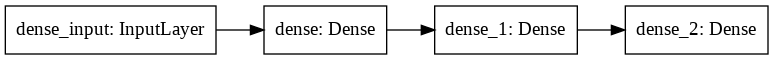

In [22]:
keras.utils.plot_model(model, show_shapes=False, rankdir="LR")

In [23]:
model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Optimizadores en keras: https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/

<img src="https://gitcdn.xyz/cdn/Tony607/blog_statics/e1a0b1e060e783bd1978a141acff897ae71bd021/images/optimizer/optimizer.gif" width="300px">

En clase: 

- Hablar del InputLayer y Dense
- Repasar dimensiones de entrada y salida de cada capa
- Hablar de la capa de salida
- Contar la cantidad de parámetros a aprender

In [24]:
x_test.shape, y_test.shape

((60, 13), (60, 2))

En clase: 

- Hablar del set de datos de validación, epochs y batch size
- Actualización de los gradientes

In [25]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=32) # tambien se puede usar: validation_split=0.2

Epoch 1/40
8/8 [==============================] - 0s 21ms/step - loss: 0.5892 - accuracy: 0.6793 - val_loss: 0.5529 - val_accuracy: 0.6833
Epoch 2/40
8/8 [==============================] - 0s 3ms/step - loss: 0.5130 - accuracy: 0.7848 - val_loss: 0.4296 - val_accuracy: 0.8667
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 0.4675 - accuracy: 0.7932 - val_loss: 0.3949 - val_accuracy: 0.8167
Epoch 4/40
8/8 [==============================] - 0s 4ms/step - loss: 0.4437 - accuracy: 0.8186 - val_loss: 0.3494 - val_accuracy: 0.9167
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 0.4255 - accuracy: 0.8143 - val_loss: 0.3434 - val_accuracy: 0.8500
Epoch 6/40
8/8 [==============================] - 0s 4ms/step - loss: 0.4096 - accuracy: 0.8565 - val_loss: 0.4219 - val_accuracy: 0.7667
Epoch 7/40
8/8 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.8186 - val_loss: 0.3743 - val_accuracy: 0.8333
Epoch 8/40
8/8 [=================

En clase:

- Hablar del objeto `history`

In [26]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plot_all(history):
  fig1 = go.Figure()
  fig1.add_trace(go.Scattergl(y=history.history['accuracy'], name='Train'))
  fig1.add_trace(go.Scattergl(y=history.history['val_accuracy'], name='Valid'))
  fig1.update_layout(height=300, width=400,xaxis_title='Epoch', yaxis_title='accuracy')

  fig2 = go.Figure()
  fig2.add_trace(go.Scattergl(y=history.history['loss'], name='Train'))
  fig2.add_trace(go.Scattergl(y=history.history['val_loss'], name='Valid'))
  fig2.update_layout(height=300, width=400,xaxis_title='Epoch', yaxis_title='Loss')

  return [fig1,fig2]

In [27]:
fig1,fig2=plot_all(history)
fig1.show()
fig2.show()

En clase:

- Analizar que pasó. ¿Es aceptable el resultado?
- Escuchar propuestas para mejorar

In [28]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   31G   73G  30% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.9G     0  5.9G   0% /dev/shm
tmpfs           6.4G   12K  6.4G   1% /var/colab
/dev/sda1       114G   32G   83G  28% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G   14G  2.0G  88% /content/drive


## Ejercicios!

A) Usar el optimizador Adam. Crear `model2`. 

Probar los learning rate: 0.1, 0.001, 0.0005

B) ¿Se estabiliza en alguno?



C) ¿Se estabiliza en alguna época? Hablar del early stopping

In [29]:
model2 = Sequential()

model2.add(Dense(128, input_dim=in_shape)) # input_dim son las variables de entrada
model2.add(Dense(64, activation='relu'))
model2.add(Dense(2, activation='softmax')) # softmax necesitamos N neuronas

model2.compile(optimizer=keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [30]:
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test) , epochs=40, batch_size=32) # tambien se puede usar: validation_split=0.2

Epoch 1/40
8/8 [==============================] - 0s 17ms/step - loss: 0.6072 - accuracy: 0.6456 - val_loss: 0.4706 - val_accuracy: 0.9167
Epoch 2/40
8/8 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.7932 - val_loss: 0.4615 - val_accuracy: 0.8000
Epoch 3/40
8/8 [==============================] - 0s 4ms/step - loss: 0.4576 - accuracy: 0.8059 - val_loss: 0.3579 - val_accuracy: 0.8833
Epoch 4/40
8/8 [==============================] - 0s 4ms/step - loss: 0.4370 - accuracy: 0.7932 - val_loss: 0.3686 - val_accuracy: 0.8167
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 0.4163 - accuracy: 0.8439 - val_loss: 0.3781 - val_accuracy: 0.7833
Epoch 6/40
8/8 [==============================] - 0s 4ms/step - loss: 0.4167 - accuracy: 0.8312 - val_loss: 0.3272 - val_accuracy: 0.8667
Epoch 7/40
8/8 [==============================] - 0s 3ms/step - loss: 0.3984 - accuracy: 0.8354 - val_loss: 0.3111 - val_accuracy: 0.8833
Epoch 8/40
8/8 [=================

In [31]:
fig1,fig2=plot_all(history2)
fig1.show()
fig2.show()

In [36]:
def train_and_plot_hist(lr):
  model = Sequential()

  model.add(Dense(128, input_dim=in_shape)) # input_dim son las variables de entrada
  model.add(Dense(64, activation='relu'))
  model.add(Dense(2, activation='softmax')) # softmax necesitamos N neuronas
  
  model.compile(optimizer=keras.optimizers.Adam(lr=lr),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  history = model2.fit(x_train, y_train, validation_data=(x_test, y_test) , verbose=False,epochs=40, batch_size=32) # tambien se puede usar: validation_split=0.2
  fig1,fig2=plot_all(history2)
  fig1.show()
  fig2.show()

# 0.1, 0.001, 0.0005
train_and_plot_hist(lr=0.1)

In [37]:
# 0.1, 0.001, 0.0005
train_and_plot_hist(lr=0.001)

In [38]:
train_and_plot_hist(lr=0.0005)